In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/boston (1).csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
x=df.drop('MEDV',axis=1)
y=df['MEDV']

In [5]:
x=np.array(x)
y=np.array(y).reshape(-1,1)

In [8]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.3,random_state=42
)

In [11]:
x_train

array([[2.98500e-02, 0.00000e+00, 2.18000e+00, ..., 1.87000e+01,
        3.94120e+02, 5.21000e+00],
       [1.31580e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.93300e+02, 1.20400e+01],
       [1.71420e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.96900e+02, 1.02100e+01],
       ...,
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [1.11604e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [2.28760e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        7.08000e+01, 1.06300e+01]])

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#Fit only training data
x_train=scaler.fit_transform(x_train)
#transform test data using same parameters
x_test=scaler.transform(x_test)

In [14]:
from sklearn.linear_model import Lasso

In [16]:
from sklearn.linear_model import LassoCV
#try multiple alpha values
alphas=np.logspace(-3,3,7)
lasso_cv=LassoCV(alphas=alphas,cv=10)
lasso_cv.fit(x_train,y_train)
print("Best alpha:",lasso_cv.alpha_)

Best alpha: 0.001


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
best_ridge=Lasso(alpha=lasso_cv.alpha_)
best_ridge.fit(x_train,y_train)
y_pred=best_ridge.predict(x_test)

In [18]:
from sklearn.metrics import mean_squared_error,r2_score

In [19]:
#MSE
mse=mean_squared_error(y_test,y_pred)

In [20]:
#RMSE
rmse=np.sqrt(mse)

In [21]:
#R2 score
r2=r2_score(y_test,y_pred)

In [22]:
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 score:",r2)

MSE: 21.521510718492532
RMSE: 4.63912822828735
R2 score: 0.7111714316191495


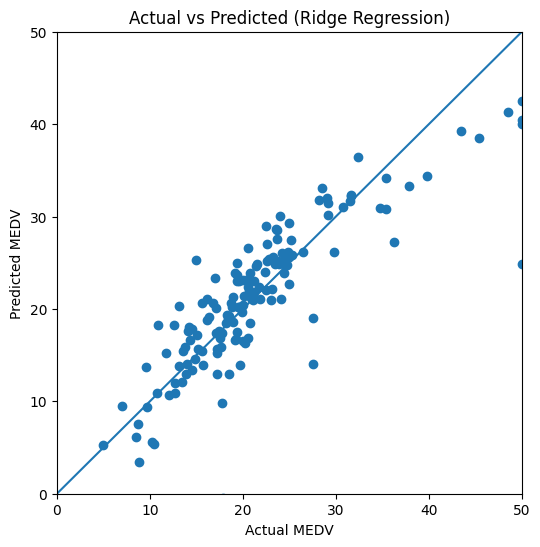

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)
#plot prediction line
max_val=max(y_test.max(),y_pred.max())
plt.plot([0,max_val],[0,max_val], )
#start axes from 0
plt.xlim(0,max_val)
plt.ylim(0,max_val)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted (Ridge Regression)')
plt.show()

In [26]:
best_ridge=Lasso(alpha=lasso_cv.alpha_)
best_ridge.fit(x_train,y_train)
y_train_pred=best_ridge.predict(x_train)

In [27]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_train,y_train_pred)
print("mean square error:",mse)
rmse=np.sqrt(mse)
print("root mean square error:",rmse)
r2=r2_score(y_train,y_train_pred)
print("r-squared value:",r2)

mean square error: 22.54555429526183
root mean square error: 4.74821590655499
r-squared value: 0.7434989248646879


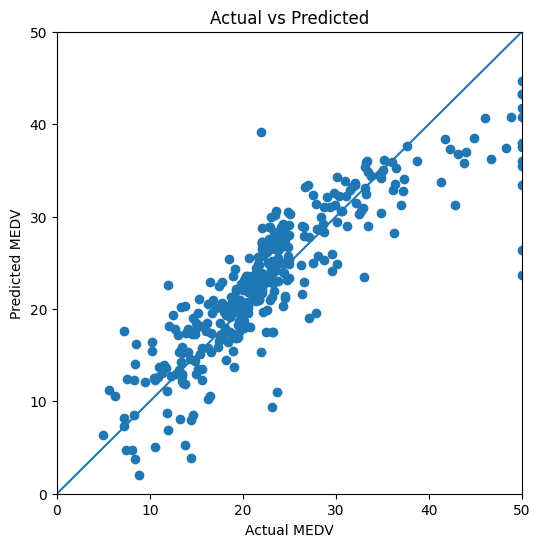

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_train,y_pred)
#plot prediction line
max_val=max(y_test.max(),y_train_pred.max())
plt.plot([0,max_val],[0,max_val], )
#start axes from 0
plt.xlim(0,max_val)
plt.ylim(0,max_val)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted')
plt.show()